In [51]:
import numpy as np
from numpy import ma
import math
import scipy
import scipy.constants as constants
import os
from IPython.display import Image

from netCDF4 import Dataset
      
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from tqdm.notebook import tqdm,trange
# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [52]:
# split number is 3

FILEDIR1 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/Splitting_number/gc_2x25_lagrange_N3'
NcFile1   = Dataset(FILEDIR1+'/OutputDir/GEOSChem.SpeciesConc.201501_02.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]
LA1              = NcFile1.variables['SpeciesConc_PASV_LA']
LA11             = NcFile1.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA1 = LA1 + LA11

GC_AREA1 = NcFile1.variables['AREA'][:,:];


# split number is 5

FILEDIR2 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/Splitting_number/gc_2x25_lagrange_N5'
NcFile2   = Dataset(FILEDIR2+'/OutputDir/GEOSChem.SpeciesConc.201501_02.nc4','r',format='NETCDF4_CLASSIC')

lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]
LA2              = NcFile2.variables['SpeciesConc_PASV_LA']
LA22            = NcFile2.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA2 = LA2 + LA22

GC_AREA2 = NcFile2.variables['AREA'][:,:];


# split number is 7
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/Splitting_number/gc_2x25_lagrange_N7'
NcFile3   = Dataset(FILEDIR3+'/OutputDir/GEOSChem.SpeciesConc.201501_02.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
LA3              = NcFile3.variables['SpeciesConc_PASV_LA']
LA33             = NcFile3.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA3 = LA3 + LA33

GC_AREA3 = NcFile3.variables['AREA'][:,:];



LA1.shape

(58, 72, 91, 144)

In [53]:
del NcFile1, NcFile2, NcFile3

In [54]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------
            

# 2x2.5         
AD_file1 = open(FILEDIR1+'/State_Met_AD.txt','r')

GC_AD1 = LA1[0,:,:,:]*0.0

Nx = len(LA1[0,0,0,:])
Ny = len(LA1[0,0,:,0])
Nz = len(LA1[0,:,0,0])
Nt = len(LA1[:,0,0,0])

for ix in range(Nx):
    for iy in range(Ny):
        for iz in range(Nz):
            line = AD_file1.readline()
            GC_AD1[iz,iy,ix] = float(line)
            


In [55]:
del AD_file1


In [56]:
# # 3-D entropy

# k = constants.k
# print(f'Boltzmann constant={k}')

# # change total air mass from kg to mol

# AD1_mol = GC_AD1[:,:,:]*1000.0/28.97
# AD2_mol = GC_AD2[:,:,:]*1000.0/28.97

# # entropy

# Entropy3d_EU1, Entropy3d_LA1, Entropy3d_EU2, Entropy3d_LA2 = [], [], [], []

# for it in range(Nt1):
#     S_EU1 = -k*np.sum( GC_AD1[:,:,:]*EU1[it,:,:,:]* np.log(EU1[it,:,:,:], out=np.zeros_like(EU1[it,:,:,:]), \
#                                                            where=(EU1[it,:,:,:]!=0)), axis=(0,1,2) )
#     S_LA1 = -k*np.sum( GC_AD1[:,:,:]*LA1[it,:,:,:]* np.log(LA1[it,:,:,:], out=np.zeros_like(LA1[it,:,:,:]), \
#                                                            where=(LA1[it,:,:,:]!=0)), axis=(0,1,2) )

#     S_EU2 = -k*np.sum( GC_AD2[:,:,:]*EU2[it,:,:,:]* np.log(EU2[it,:,:,:], out=np.zeros_like(EU2[it,:,:,:]), \
#                                                            where=(EU2[it,:,:,:]!=0)), axis=(0,1,2) )
#     S_LA2 = -k*np.sum( GC_AD2[:,:,:]*LA2[it,:,:,:]* np.log(LA2[it,:,:,:], out=np.zeros_like(LA2[it,:,:,:]), \
#                                                            where=(LA2[it,:,:,:]!=0)), axis=(0,1,2) )
    
#     Entropy3d_EU1.append(S_EU1)
#     Entropy3d_LA1.append(S_LA1)
#     Entropy3d_EU2.append(S_EU2)    
#     Entropy3d_LA2.append(S_LA2)
    
# # print(Entropy3d_EU1, Entropy3d_LA1)
# # print(Entropy3d_EU2, Entropy3d_LA2)



In [57]:
# # Plot CFD curve: mass vs. area
# plt.figure(figsize=(10,7), dpi= 80)

# plt.plot(Entropy3d_LA1,'b',label=f'Lagrange 2*2.5')
# plt.plot(Entropy3d_LA2,'b--',label=f'Lagrange 4*5')

# plt.plot(Entropy3d_EU1,'r',label=f'Euler 2*2.5')
# plt.plot(Entropy3d_EU2,'r--',label=f'Euler 4*5')


# #plt.legend(loc='upper left')
# plt.title(' Entropy3d')
# plt.xlabel(' day ')
# plt.ylabel(' Entropy ')
# plt.legend()

# plt.savefig('Entropy_time_series.png')
# plt.clf();
# plt.cla();
# plt.close();

# Image('Entropy_time_series.png') 

In [58]:
# # 2-D entropy corresponding to the below contour figure

# k = constants.k
# print(f'Boltzmann constant={k}')

# # change total air mass from kg to mol:
# AD1_mol = GC_AD1[:,:,:]*1000.0/28.97
# AD2_mol = GC_AD2[:,:,:]*1000.0/28.97


# Entropy2d_EU1, Entropy2d_LA1, Entropy2d_EU2, Entropy2d_LA2 = [], [], [], []


# AD1_mol_Zsum = np.sum(AD1_mol, axis=0)
# AD2_mol_Zsum = np.sum(AD2_mol, axis=0)

# for it in range(Nt1):
#     # change 3D mixing ratio to 2D:
#     EU1_mol_Zsum = np.sum( EU1[it,:,:,:]*AD1_mol[:,:,:], axis=0)
#     LA1_mol_Zsum = np.sum( LA1[it,:,:,:]*AD1_mol[:,:,:], axis=0)

#     EU2_mol_Zsum = np.sum( EU2[it,:,:,:]*AD2_mol[:,:,:], axis=0)
#     LA2_mol_Zsum = np.sum( LA2[it,:,:,:]*AD2_mol[:,:,:], axis=0)

#     # calculate 2D mixing ratio:
#     EU1_MR = EU1_mol_Zsum/AD1_mol_Zsum
#     LA1_MR = LA1_mol_Zsum/AD1_mol_Zsum

#     EU2_MR = EU2_mol_Zsum/AD2_mol_Zsum
#     LA2_MR = LA2_mol_Zsum/AD2_mol_Zsum

#     # entropy
#     S2_EU1 = -k*np.sum( AD1_mol_Zsum[:,:]*EU1_MR[:,:]* np.log(EU1_MR[:,:], out=np.zeros_like(EU1_MR[:,:]), \
#                                                               where=(EU1_MR[:,:]!=0)), axis=(0,1) )
#     S2_LA1 = -k*np.sum( AD1_mol_Zsum[:,:]*LA1_MR[:,:]* np.log(LA1_MR[:,:], out=np.zeros_like(LA1_MR[:,:]), \
#                                                               where=(LA1_MR[:,:]!=0)), axis=(0,1) )

#     S2_EU2 = -k*np.sum( AD2_mol_Zsum[:,:]*EU2_MR[:,:]* np.log(EU2_MR[:,:], out=np.zeros_like(EU2_MR[:,:]), \
#                                                           where=(EU2_MR[:,:]!=0)), axis=(0,1) )
#     S2_LA2 = -k*np.sum( AD2_mol_Zsum[:,:]*LA2_MR[:,:]* np.log(LA2_MR[:,:], out=np.zeros_like(LA2_MR[:,:]), \
#                                                           where=(LA2_MR[:,:]!=0)), axis=(0,1) )

#     Entropy2d_EU1.append(S2_EU1)
#     Entropy2d_LA1.append(S2_LA1)
#     Entropy2d_EU2.append(S2_EU2)    
#     Entropy2d_LA2.append(S2_LA2)

# # print(Entropy2d_EU1, Entropy2d_LA1)
# # print(Entropy2d_EU2, Entropy2d_LA2)


In [59]:
# # Plot CFD curve: mass vs. area
# plt.figure(figsize=(10,7), dpi= 80)

# plt.plot(Entropy2d_LA1,'b',label=f'Lagrange 2*2.5')
# plt.plot(Entropy2d_LA2,'b--',label=f'Lagrange 4*5')

# plt.plot(Entropy2d_EU1,'r',label=f'Euler 2*2.5')
# plt.plot(Entropy2d_EU2,'r--',label=f'Euler 4*5')


# #plt.legend(loc='upper left')
# plt.title(' Entropy2d')
# plt.xlabel(' day ')
# plt.ylabel(' Entropy ')
# plt.legend()

# plt.savefig('Entropy_time_series.png')
# plt.clf();
# plt.cla();
# plt.close();

# Image('Entropy_time_series.png') 

In [60]:
# for Gini and cumulative distribution function (CDF)

In [61]:
### change unit, do average 

# N3
LA1_molec = LA1[:,:,:,:]*0.0
for i in range(Nt):
    LA1_molec[i,:,:,:] = LA1[i,:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA

LA1_Zsum = np.sum(LA1_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA1_Zsum[i,:,:]   = LA1_Zsum[i,:,:]/GC_AREA1[:,:]/1e4
    
print( np.sum(LA1_molec[Nt-1,:,:,:]) )


# N5
LA2_molec = LA2[:,:,:,:]*0.0
for i in range(Nt):
    LA2_molec[i,:,:,:] = LA2[i,:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA

LA2_Zsum = np.sum(LA2_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA2_Zsum[i,:,:]   = LA2_Zsum[i,:,:]/GC_AREA2[:,:]/1e4
    
print( np.sum(LA2_molec[Nt-1,:,:,:]) )


# N7
LA3_molec = LA3[:,:,:,:]*0.0
for i in range(Nt):
    LA3_molec[i,:,:,:] = LA3[i,:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA

LA3_Zsum = np.sum(LA3_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA3_Zsum[i,:,:]   = LA3_Zsum[i,:,:]/GC_AREA3[:,:]/1e4
    
print( np.sum(LA3_molec[Nt-1,:,:,:]) )

1.108042e+30
1.09579235e+30
1.10677015e+30


In [62]:
# delete original variable to save memory
del LA1, LA2, LA3

In [63]:

LA1_area_cumsum_frac_time = []
LA2_area_cumsum_frac_time = []
LA3_area_cumsum_frac_time = []

LA1_mass_cumsum_frac_time = []
LA2_mass_cumsum_frac_time = []
LA3_mass_cumsum_frac_time = []

for it in range(Nt):
    # concentration
    LA1_Zsum_1D = LA1_Zsum[it,:,:].reshape(Nx*Ny)
    LA2_Zsum_1D = LA2_Zsum[it,:,:].reshape(Nx*Ny)
    LA3_Zsum_1D = LA3_Zsum[it,:,:].reshape(Nx*Ny)

    # grid cell area
    GC_AREA1_1D = GC_AREA1.reshape(Nx*Ny)
    GC_AREA2_1D = GC_AREA2.reshape(Nx*Ny)
    GC_AREA3_1D = GC_AREA3.reshape(Nx*Ny)

    # grid cell mass for injected tracer
    LA1_molec_Zsum = np.sum(LA1_molec[it,:,:,:], axis=0)
    LA2_molec_Zsum = np.sum(LA2_molec[it,:,:,:], axis=0)
    LA3_molec_Zsum = np.sum(LA3_molec[it,:,:,:], axis=0)
   
    LA1_molec_Zsum_1D = LA1_molec_Zsum.reshape(Nx*Ny)
    LA2_molec_Zsum_1D = LA2_molec_Zsum.reshape(Nx*Ny)
    LA3_molec_Zsum_1D = LA3_molec_Zsum.reshape(Nx*Ny)


    # get index for sorted concentration
    
    LA1_index = LA1_Zsum_1D.argsort()
    LA1_area_sorted = GC_AREA1_1D[LA1_index]
    LA1_mass_sorted = LA1_molec_Zsum_1D[LA1_index]
    
    LA2_index = LA2_Zsum_1D.argsort()
    LA2_area_sorted = GC_AREA2_1D[LA2_index]
    LA2_mass_sorted = LA2_molec_Zsum_1D[LA2_index]
    
    LA3_index = LA3_Zsum_1D.argsort()
    LA3_area_sorted = GC_AREA3_1D[LA3_index]
    LA3_mass_sorted = LA3_molec_Zsum_1D[LA3_index]
    
    # cumulative sum  
    LA1_area_cumsum = np.cumsum(LA1_area_sorted)
    LA1_mass_cumsum = np.cumsum(LA1_mass_sorted)
    
    LA2_area_cumsum = np.cumsum(LA2_area_sorted)
    LA2_mass_cumsum = np.cumsum(LA2_mass_sorted)
    
    LA3_area_cumsum = np.cumsum(LA3_area_sorted)
    LA3_mass_cumsum = np.cumsum(LA3_mass_sorted)

    # calculate fraction
    
    length1 = len(LA1_area_cumsum)
    LA1_area_cumsum_frac = LA1_area_cumsum/LA1_area_cumsum[length1-1]
    LA1_mass_cumsum_frac = LA1_mass_cumsum/LA1_mass_cumsum[length1-1]

    length2 = len(LA2_area_cumsum)
    LA2_area_cumsum_frac = LA2_area_cumsum/LA2_area_cumsum[length2-1]
    LA2_mass_cumsum_frac = LA2_mass_cumsum/LA2_mass_cumsum[length2-1]

    length3 = len(LA3_area_cumsum)
    LA3_area_cumsum_frac = LA3_area_cumsum/LA3_area_cumsum[length3-1]
    LA3_mass_cumsum_frac = LA3_mass_cumsum/LA3_mass_cumsum[length3-1]
    
    #
    LA1_area_cumsum_frac_time.append(LA1_area_cumsum_frac)
    LA1_mass_cumsum_frac_time.append(LA1_mass_cumsum_frac)
    
    LA2_area_cumsum_frac_time.append(LA2_area_cumsum_frac)
    LA2_mass_cumsum_frac_time.append(LA2_mass_cumsum_frac)
    
    LA3_area_cumsum_frac_time.append(LA3_area_cumsum_frac)
    LA3_mass_cumsum_frac_time.append(LA3_mass_cumsum_frac)

In [64]:
# del LA1_molec, LA2_molec, LA3_molec
# del LA1_molec_Zsum, LA2_molec_Zsum, LA3_molec_Zsum

print(LA1_area_cumsum_frac)
print(LA2_mass_cumsum_frac)


[2.5199007723131217e-05 5.0398015446262434e-05 7.559702498838305e-05 ...
 0.9997859597206116 0.9998929500579834 1.0]
[2.6186981472164916e-07 5.256400186226529e-07 7.900278546912887e-07 ...
 0.9994943141937256 0.9997467994689941 1.0]


In [65]:
len(LA1_area_cumsum_frac),len(LA2_area_cumsum_frac)

(13104, 13104)

In [66]:
# calculate Gini coefficient

Gini_La1_time, Gini_La2_time, Gini_La3_time = [], [], []

for it in range(Nt):
    diag = np.linspace(0,1,100)
    Al = np.trapz(diag, diag)

    LA1 = np.trapz(LA1_mass_cumsum_frac_time[it], LA1_area_cumsum_frac_time[it])
    LA2 = np.trapz(LA2_mass_cumsum_frac_time[it], LA2_area_cumsum_frac_time[it])
    LA3 = np.trapz(LA3_mass_cumsum_frac_time[it], LA3_area_cumsum_frac_time[it])
    
    Gini_La1 = (Al-LA1)/Al
    Gini_La2 = (Al-LA2)/Al
    Gini_La3 = (Al-LA3)/Al
    
#     print(Gini_Eu3,Gini_La0)
    
    Gini_La1_time.append(Gini_La1)
    Gini_La2_time.append(Gini_La2)
    Gini_La3_time.append(Gini_La3)
    
print(Al)
print('Gini_La_Eu')
print(Gini_La1)
print(Gini_La2)


0.5
Gini_La_Eu
0.3246847987174988
0.32646870613098145


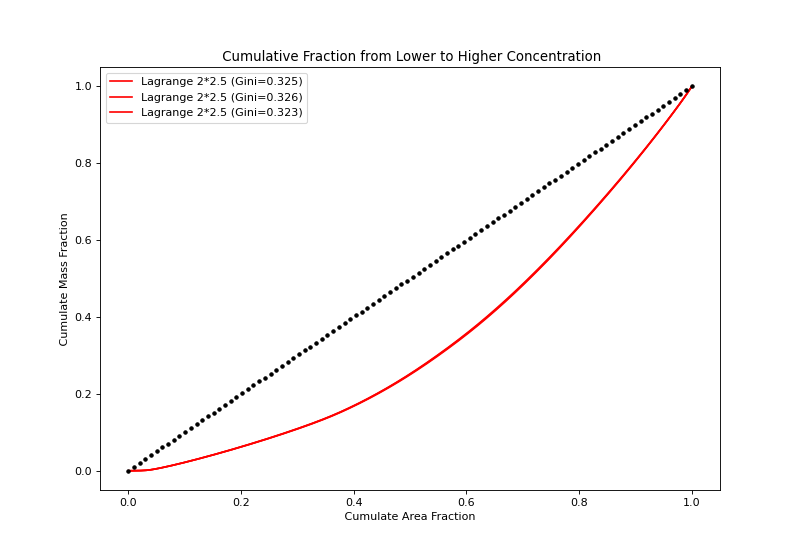

In [67]:
# Plot CFD curve: mass vs. area in the END of the simulation
plt.figure(figsize=(10,7), dpi= 80)

plt.plot(LA1_area_cumsum_frac_time[-1],LA1_mass_cumsum_frac_time[-1],'r',label=f'Lagrange 2*2.5 (Gini={Gini_La1:.3f})')
plt.plot(LA2_area_cumsum_frac_time[-1],LA2_mass_cumsum_frac_time[-1],'r',label=f'Lagrange 2*2.5 (Gini={Gini_La2:.3f})')
plt.plot(LA3_area_cumsum_frac_time[-1],LA3_mass_cumsum_frac_time[-1],'r',label=f'Lagrange 2*2.5 (Gini={Gini_La3:.3f})')


diag = np.linspace(0,1,100)
plt.plot(diag,diag,'k.')


#plt.legend(loc='upper left')
plt.title(' Cumulative Fraction from Lower to Higher Concentration')
plt.xlabel(' Cumulate Area Fraction ')
plt.ylabel(' Cumulate Mass Fraction ')
plt.legend()

plt.savefig('CDF_Area_Mass.png')
plt.clf();
plt.cla();
plt.close();

Image('CDF_Area_Mass.png') 

In [68]:
# Plot Gini coefficient at different time:

plt.figure(figsize=(12,6), dpi= 100)

plt.plot(Gini_La1_time,'r-',label=f'N3 (Gini={Gini_La1:.3f})')
plt.plot(Gini_La2_time,'k--',label=f'N5 (Gini={Gini_La2:.3f})')
plt.plot(Gini_La3_time,'b-.',label=f'N7 (Gini={Gini_La3:.3f})')

# add line for 1day, 1mon, 1year
# a = 0.5*(Gini_La0_time[1]+Gini_Eu3_time[1])
# plt.plot([1, 1], [a, a], 'kX', label='1 day')

# a = 0.5*(Gini_La0_time[30]+Gini_Eu3_time[30])
# plt.plot([30, 30], [a, a], 'kX', label='1 mon')

# a = 0.5*(Gini_La0_time[365]+Gini_Eu3_time[365])
# plt.plot([365, 365], [a, a], 'kX', label='1 year')

#plt.legend(loc='upper left')
plt.title(' Gini Coefficient at different time')
plt.xlabel(' Day ')
plt.ylabel(' Gini Coefficient ')
plt.legend()

plt.savefig('Gini_time_series.png')
plt.clf();
plt.cla();
plt.close();


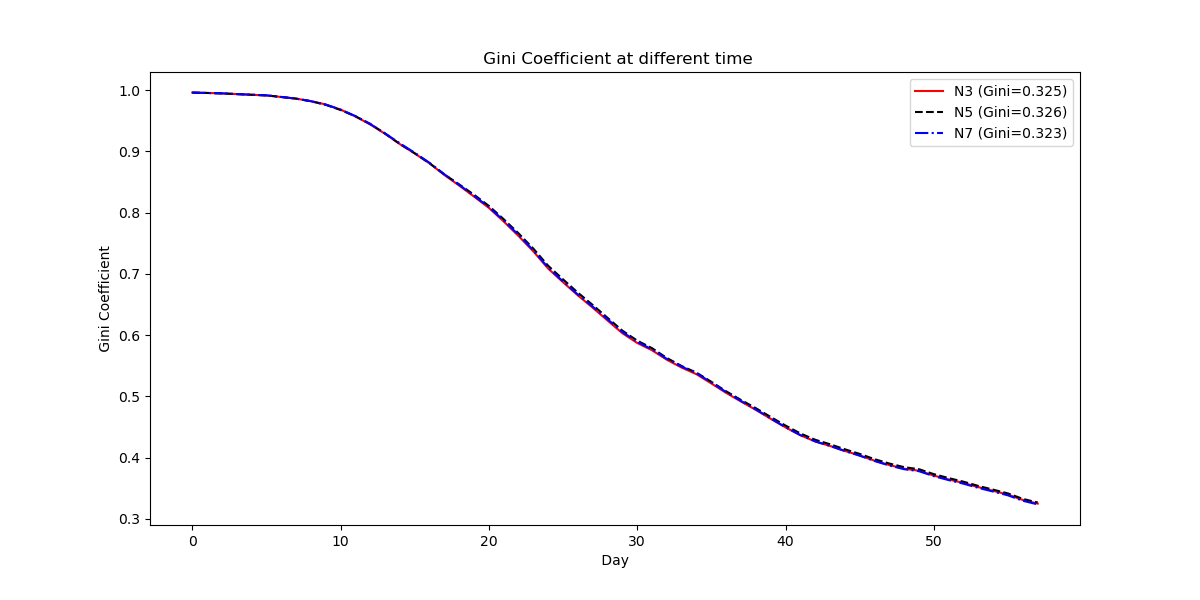

In [69]:
Image('Gini_time_series.png') 

In [29]:
plt.plot( 100*(np.array(Gini_La0_time)-Gini_Eu3_time)/Gini_Eu3_time );
plt.ylabel('percentage difference [%]');
plt.xlabel('day');

NameError: name 'Gini_La0_time' is not defined

In [18]:
CPU_La0 = 11*24+12

CPU_Eu1 = 26*24+2
CPU_Eu2 = 6*24+18
CPU_Eu3 = 18
CPU_Eu4 = 5

CPU_Eus = [CPU_Eu1, CPU_Eu2,CPU_Eu3,CPU_Eu4]
Gini_Eus = [Gini_Eu1, Gini_Eu2,Gini_Eu3,Gini_Eu4]

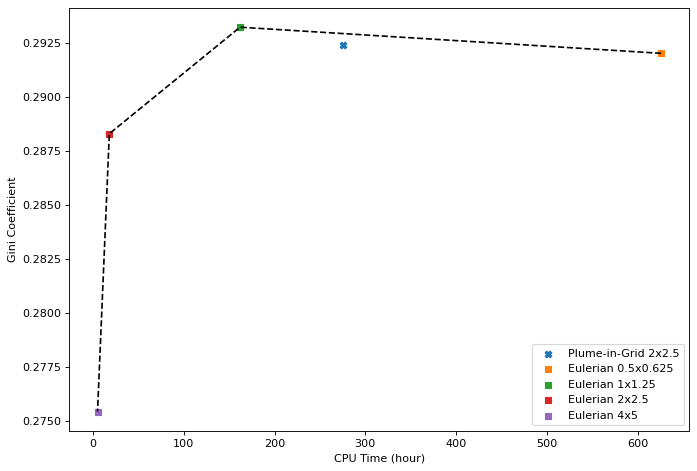

In [19]:

plt.figure(figsize=(10,7), dpi= 80)

plt.plot(CPU_Eus, Gini_Eus, 'k--')

plt.scatter(CPU_La0,Gini_La0,  marker='X', label='Plume-in-Grid 2x2.5')
plt.scatter(CPU_Eu1, Gini_Eu1, marker='s', label='Eulerian 0.5x0.625')
plt.scatter(CPU_Eu2, Gini_Eu2, marker='s', label='Eulerian 1x1.25')
plt.scatter(CPU_Eu3, Gini_Eu3, marker='s', label='Eulerian 2x2.5')
plt.scatter(CPU_Eu4, Gini_Eu4, marker='s', label='Eulerian 4x5')

# plt.plot([CPU_Eu1, CPU_Eu1],[0.6,0.7],'y',label='Eulerian 0.5x0.625')

plt.xlabel('CPU Time (hour)')
plt.ylabel('Gini Coefficient')
plt.legend()